In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [2]:
superpixel_files = '/datasets/eduardo/foresteyes/superpixels_pucmg/SegmPCA_original/SLIC/scenes_pca/4000'
scenes_files = '/datasets/eduardo/foresteyes/landsat_8/allbands_8b/'
gt_dir = '/datasets/eduardo/foresteyes/truth_masks/'

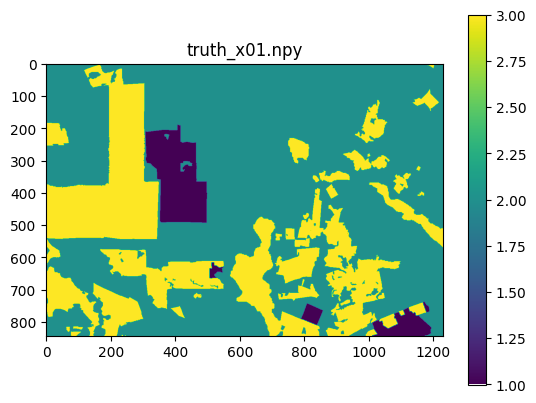

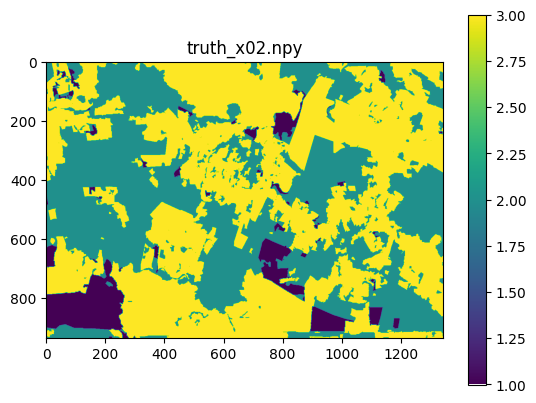

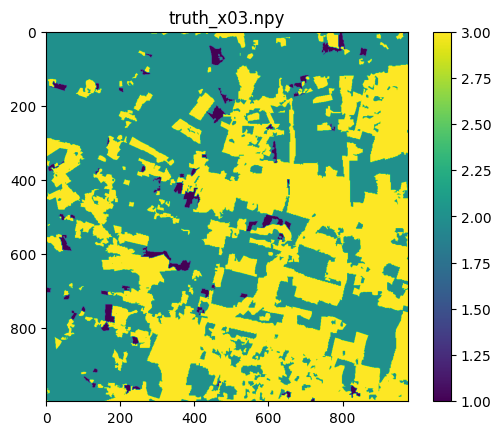

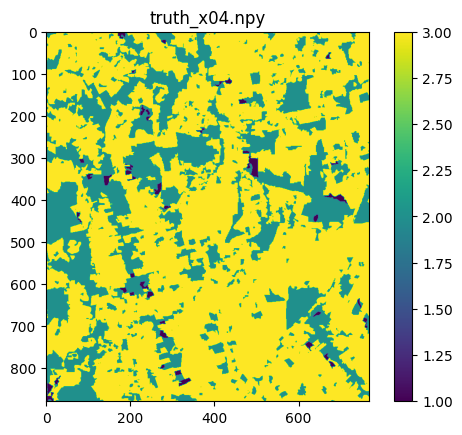

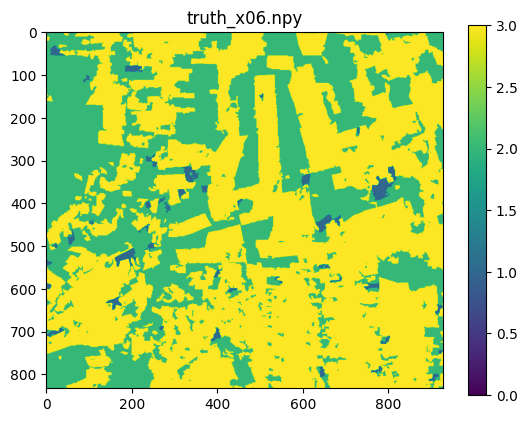

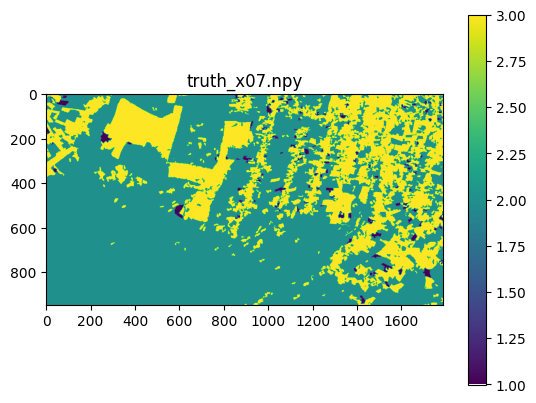

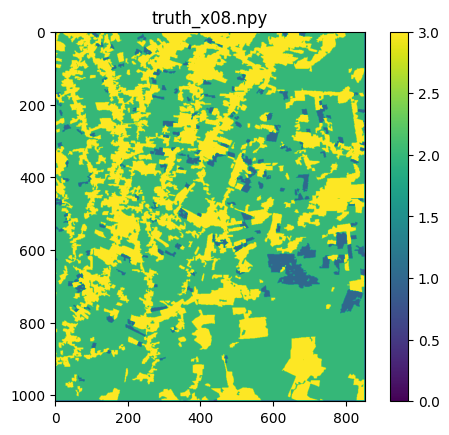

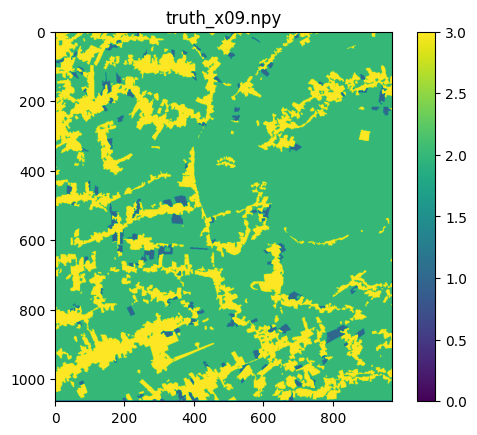

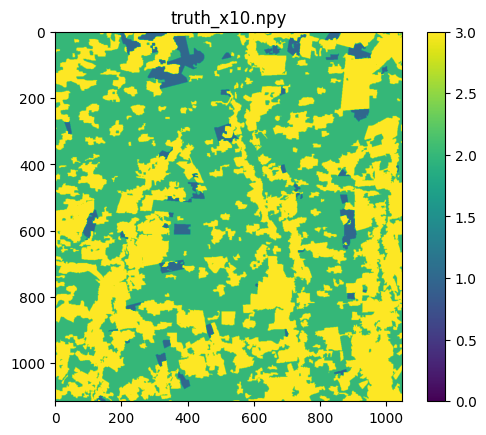

In [3]:
# Plot all truth masks with colorbar
import pandas as pd
info = []
for gt in sorted(os.listdir(gt_dir)):
    FP = 0
    NFP = 0
    if gt.endswith('.npy'):
        gt_path = os.path.join(gt_dir, gt)
        gt_mask = np.load(gt_path)
        FP += np.sum(np.where(gt_mask == 2, 1, 0))
        NFP += np.sum(np.where(gt_mask == 3, 1, 0))
        info.append({"region": gt, "ForestPixels": FP, "NonForestPixels": NFP})
        plt.imshow(gt_mask)
        plt.colorbar()
        plt.title(gt)
        plt.show()


In [4]:
info_df = pd.DataFrame.from_records(info)
info_df

,region,ForestPixels,NonForestPixels
0,truth_x01.npy,702348,282337
1,truth_x02.npy,513180,661068
2,truth_x03.npy,552014,403195
3,truth_x04.npy,186406,481616
4,truth_x06.npy,292523,466894
5,truth_x07.npy,1153696,518267
6,truth_x08.npy,545811,277714
7,truth_x09.npy,761704,243279
8,truth_x10.npy,633050,492708


In [5]:
info_df[["ForestPixels", "NonForestPixels"]].sum()

ForestPixels       5340732
NonForestPixels    3827078
dtype: int64

In [3]:
ds = SegmentsDataset(scenes_files, gt_dir, superpixel_files)

(843, 1230, 3)


In [4]:
len(ds)

26355

In [5]:
dataset_info = []
for i in range(len(ds)):
    data_point = ds[i]
    dataset_info.append(data_point)

dataset_info = pd.DataFrame.from_records(dataset_info).drop(columns=['scene'])
dataset_info.head()

,class,superpixel_id,region_id
0,forest,1,x01
1,not_analyzed,2,x01
2,forest,3,x01
3,not_analyzed,4,x01
4,not_analyzed,5,x01


In [6]:
print(dataset_info['class'].value_counts())

class
not_analyzed            19773
forest                   6294
recent_deforestation      288
Name: count, dtype: int64


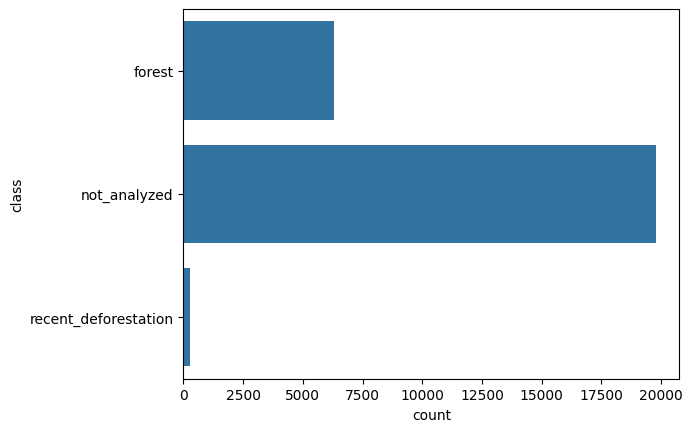

In [7]:
# Make a histogram of the classes and show counts
sns.countplot(dataset_info['class'])
plt.show()

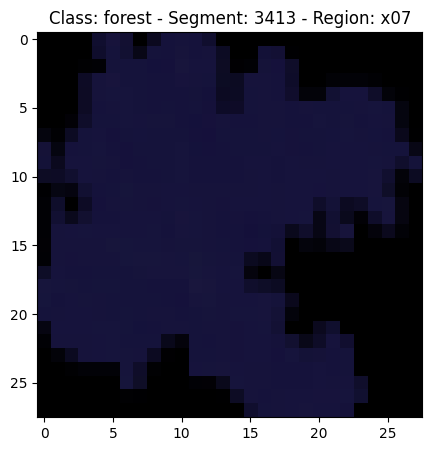

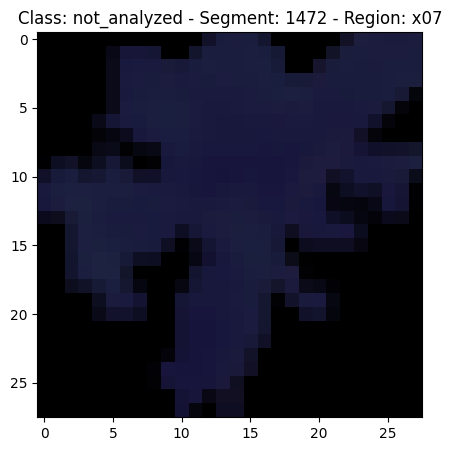

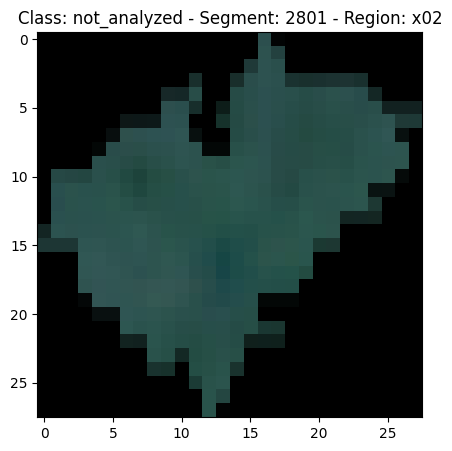

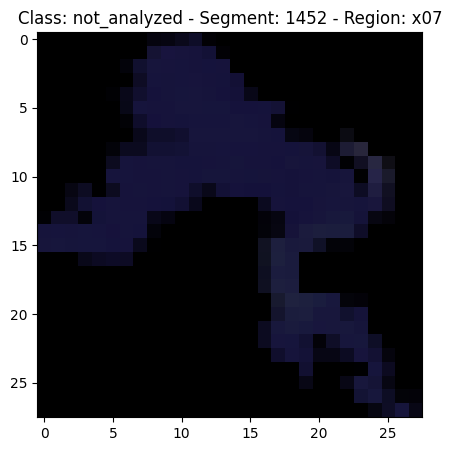

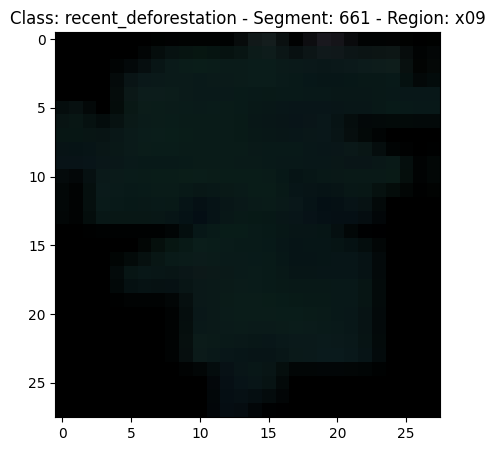

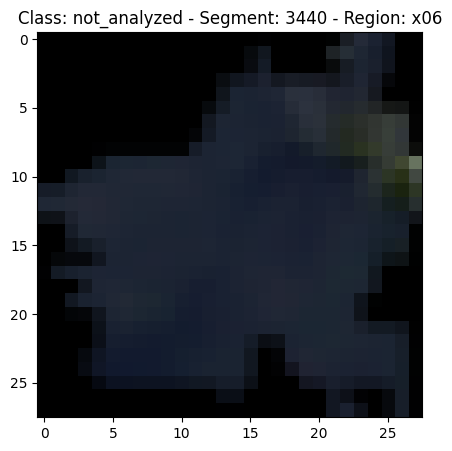

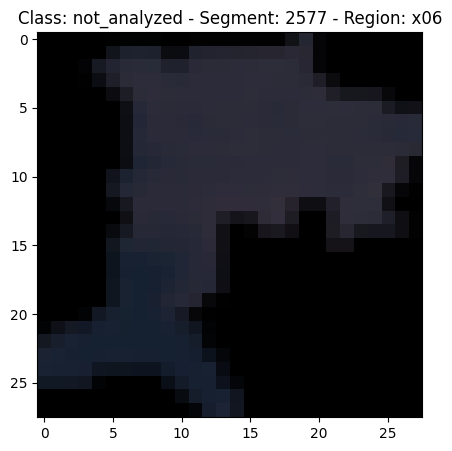

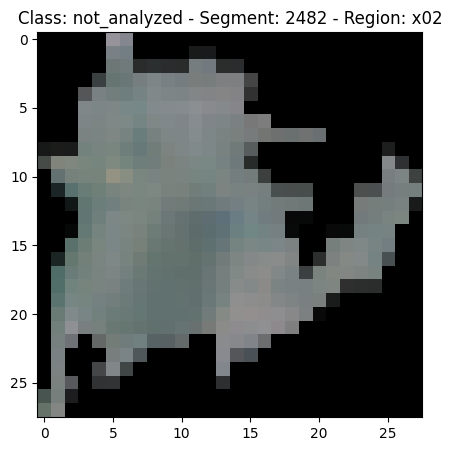

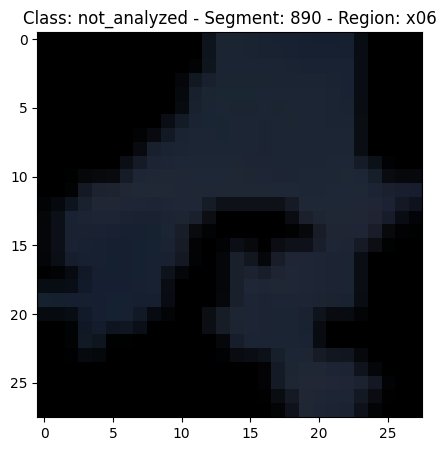

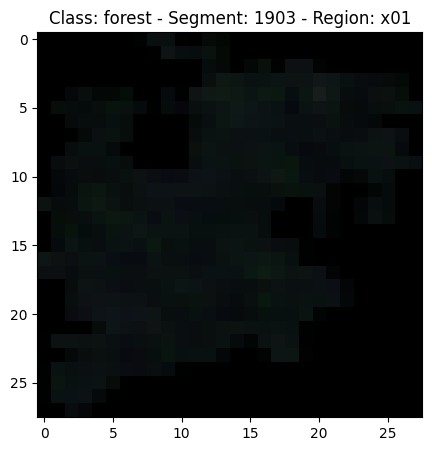

In [8]:
import random

for random_idx in random.sample(range(len(ds)), 10):
    scene, gt, segment_id, region_id = ds[random_idx].values()

    fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    ax.imshow(scene)
    ax.set_title(f'Class: {gt} - Segment: {segment_id} - Region: {region_id}')
    plt.show()